In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import warnings
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score

In [ ]:
warnings.filterwarnings('ignore')

data = pd.read_csv("/content/media prediction and its cost.csv")

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(data)

df_c = data.copy()

df_c.drop(columns="store_state",inplace=True)

cat_cols, num_cols, cat_but_car = grab_col_names(df_c)

ohe_cols= [col for col in cat_cols if 12 >= df_c[col].nunique() > 5]

df_sscale = data.copy()
ss = StandardScaler()
df_sscale[['store_sales(in millions)','store_cost(in millions)']] = ss.fit_transform(df_sscale[['store_sales(in millions)','store_cost(in millions)']])



def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df_c = one_hot_encoder(df_c, ohe_cols)

def rare_encoding(df, column):
  freqs = df[column].value_counts(normalize=True)
  frequent_cat = [x for x in freqs.loc[freqs > 0.02].index.values]
  df[column] = np.where(df[column].isin(frequent_cat),df[column], "Rare")

for i in range(len(cat_but_car)):
  rare_encoding(df_c,cat_but_car[i])

all_cats = cat_but_car + cat_cols

drop_cols = [col for col in all_cats if data[col].nunique() > 12]

df_c.drop(columns=drop_cols,inplace=True)

label_enc_cols = [col for col in cat_cols if data[col].nunique() <= 5 and data[col].dtypes == 'O']

label_enc = LabelEncoder()

df_c["marital_status"] = label_enc.fit_transform(df_c["marital_status"])
df_c["gender"] = label_enc.fit_transform(df_c["gender"])
df_c["houseowner"] = label_enc.fit_transform(df_c["houseowner"])
df_c["member_card"] = label_enc.fit_transform(df_c["member_card"])
df_c["sales_country"] = label_enc.fit_transform(df_c["sales_country"])  
df_c["food_family"] = label_enc.fit_transform(df_c["food_family"])

df_c["store_type"] = label_enc.fit_transform(df_c["store_type"])
df_c["education"] = label_enc.fit_transform(df_c["education"])
df_c["occupation"] = label_enc.fit_transform(df_c["occupation"])

df_c["sales_country"].value_counts()

df_2 = df_c.copy()
y = df_2["sales_country"]
X = df_2.drop("sales_country", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


df_2.info()
dd = df_2.head()


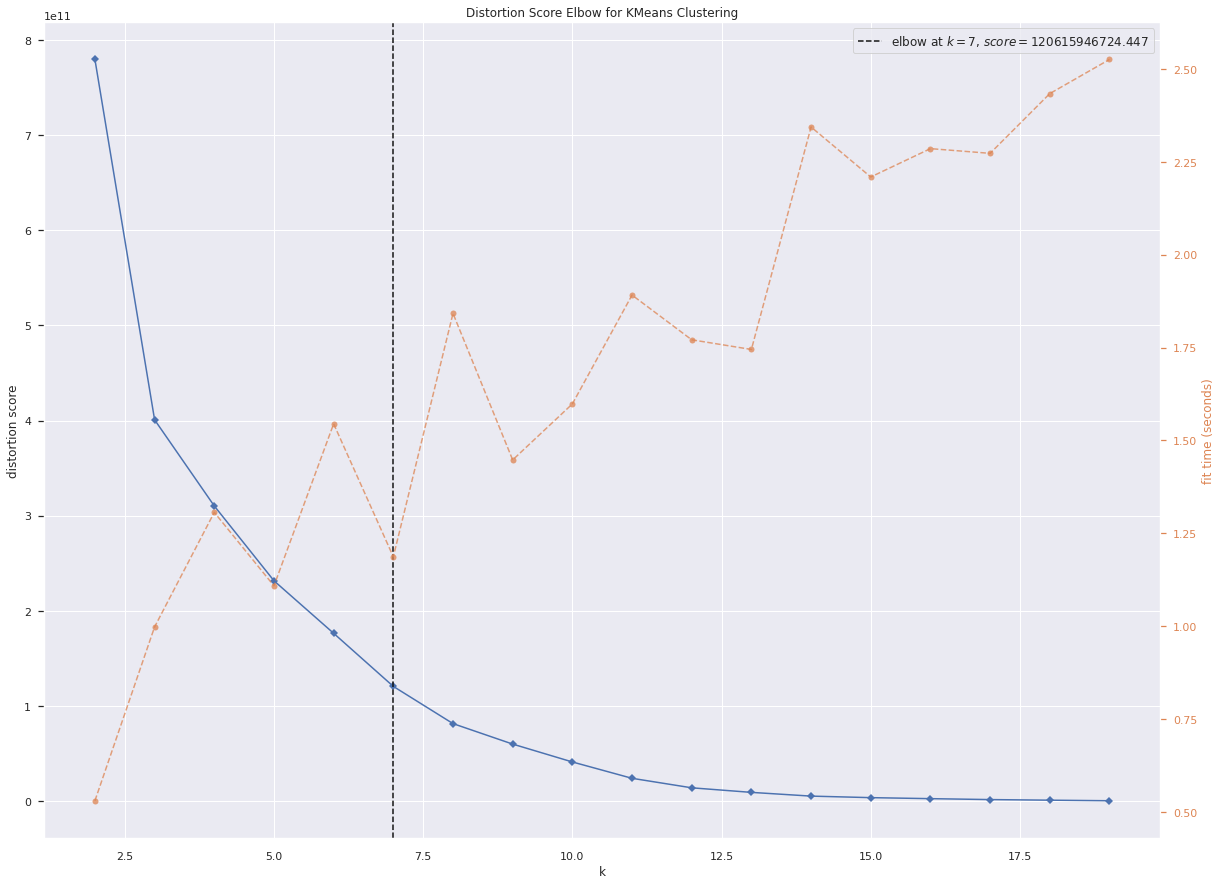

            cluster_no
cluster_no            
1                 4641
2                 6381
3                19465
4                12178
5                 3108
6                 4923
7                 3689


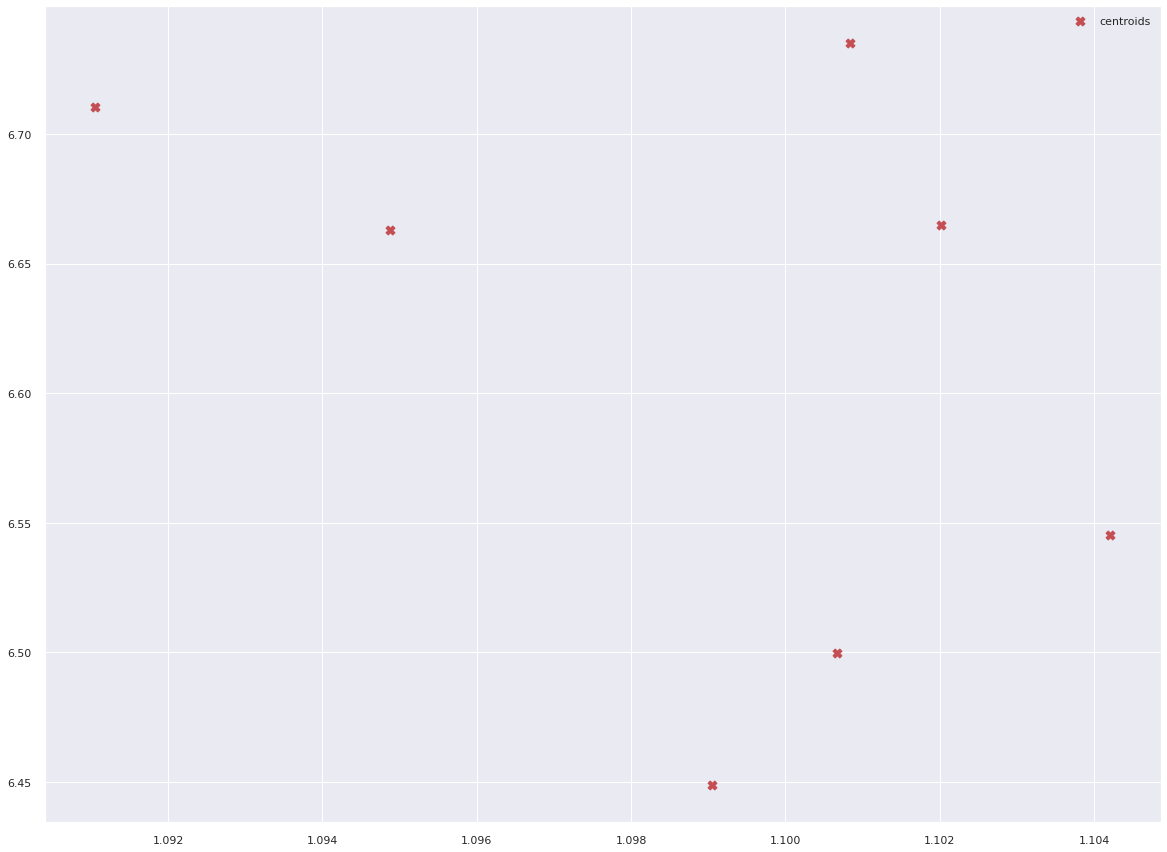

In [34]:
def k_means(x):
   
    km = KMeans(n_clusters=7, random_state=0).fit(x)

    kmeans = KMeans()
    elbow = KElbowVisualizer(kmeans, k=(2, 20))
    elbow.fit(x)
    elbow.show()

    elbow.elbow_value_


    labels = km.predict(x)

    label = km.labels_

    '''
    plt.scatter(x.iloc[:, 0],
            x.iloc[:, 1],
            c=label,
            s=50,
            cmap="viridis")
    plt.show()


    center = km.cluster_centers_

    plt.scatter(x.iloc[:, 0],
                x.iloc[:, 1],
                c=label,
                s=50,
                cmap="viridis")

    plt.scatter(center[:, 0],
                center[:, 1],
                c="red",
                s=200,
                alpha=0.8)
    plt.show()
    '''
    kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(x)
    kumeler = kmeans.labels_

    df = x
    pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

    df["cluster_no"] = kumeler

    df["cluster_no"] = df["cluster_no"] + 1

    df.head()

    df.groupby("cluster_no").agg({"cluster_no": "count"})
    df.groupby("cluster_no").agg(np.mean)

    df[df["cluster_no"] == 5]

    df[df["cluster_no"] == 6]

    print( df.groupby("cluster_no").agg({"cluster_no": "count"}))
    
    sns.set(rc={'figure.figsize':(20,15)})
    '''
    p = sns.scatterplot(data=df, x="cost", y="store_sales(in millions)", hue=labels, legend="full", palette="deep")
    sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
    plt.show()
    '''
   # sns.scatterplot(data=df, x="cost", y="food_family", hue=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                marker="X", c="r", s=80, label="centroids")
    plt.legend()
    plt.show()
    


k_means(X_train)

In [ ]:
def hierar (df):


  hc_complete = linkage(df, "complete")
  hc_single = linkage(df, "single")

  plt.figure(figsize=(10, 5))
  plt.title("Hiyerarşik Kümeleme Dendogramı")
  plt.xlabel("Gözlem Birimleri")
  plt.ylabel("Uzaklıklar")
  dendrogram(hc_complete,
            leaf_font_size=10)
  plt.show()


  plt.figure(figsize=(7, 5))
  plt.title("Dendrograms")
  dend = dendrogram(hc_single,
                    truncate_mode="lastp",
                    p=10,
                    show_contracted=True,
                    leaf_font_size=10)
  plt.axhline(y=0.5, color='r', linestyle='--')
  plt.show()

hierar(X_train)

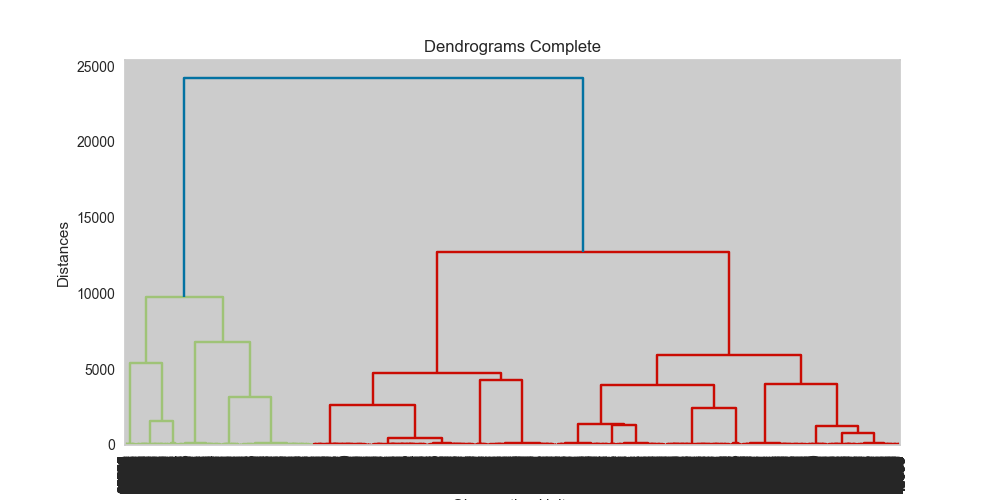

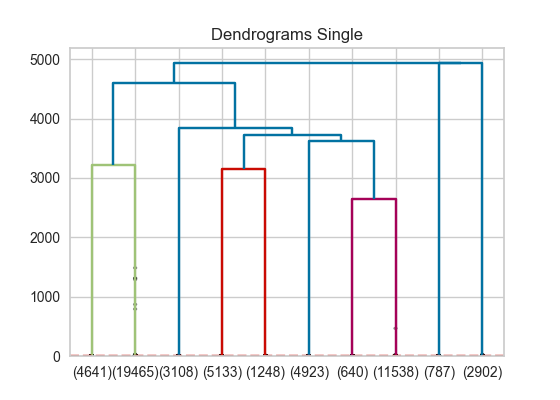

In [ ]:
from sklearn.cluster import AgglomerativeClustering
def xy(df):
  cluster = AgglomerativeClustering(n_clusters=5)
  cluster.fit_predict(df)

  labels = cluster.labels_

  df["cluster_no"] = cluster.fit_predict(df)
  
  sns.set(rc={'figure.figsize':(20,15)})
  p = sns.scatterplot(data=df, x="cost", y="store_sales(in millions)", hue=labels, legend="full", palette="deep")
  sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
  plt.show()


xy(X_train)

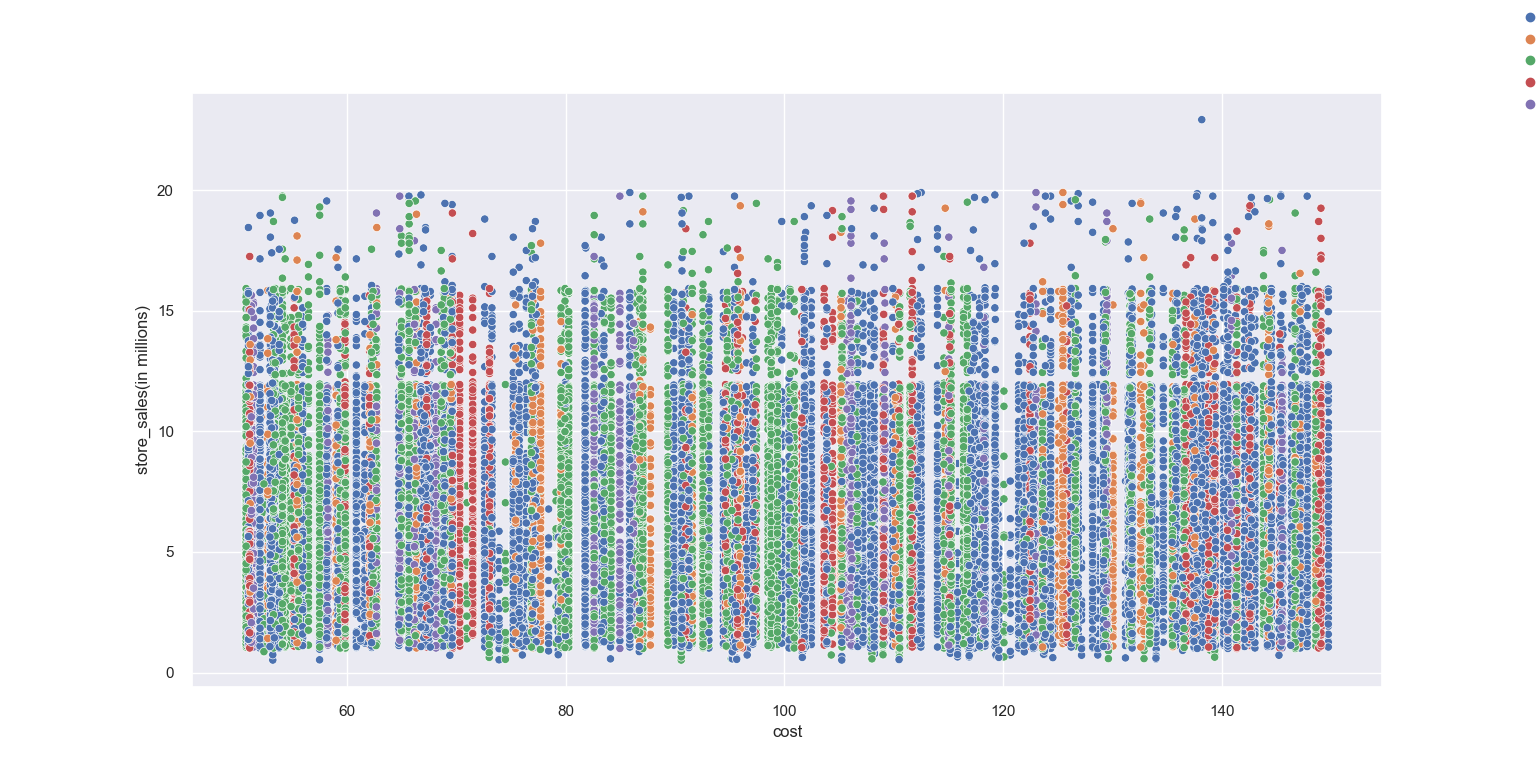

Estimated number of clusters: 158
Estimated number of noise points: 4664


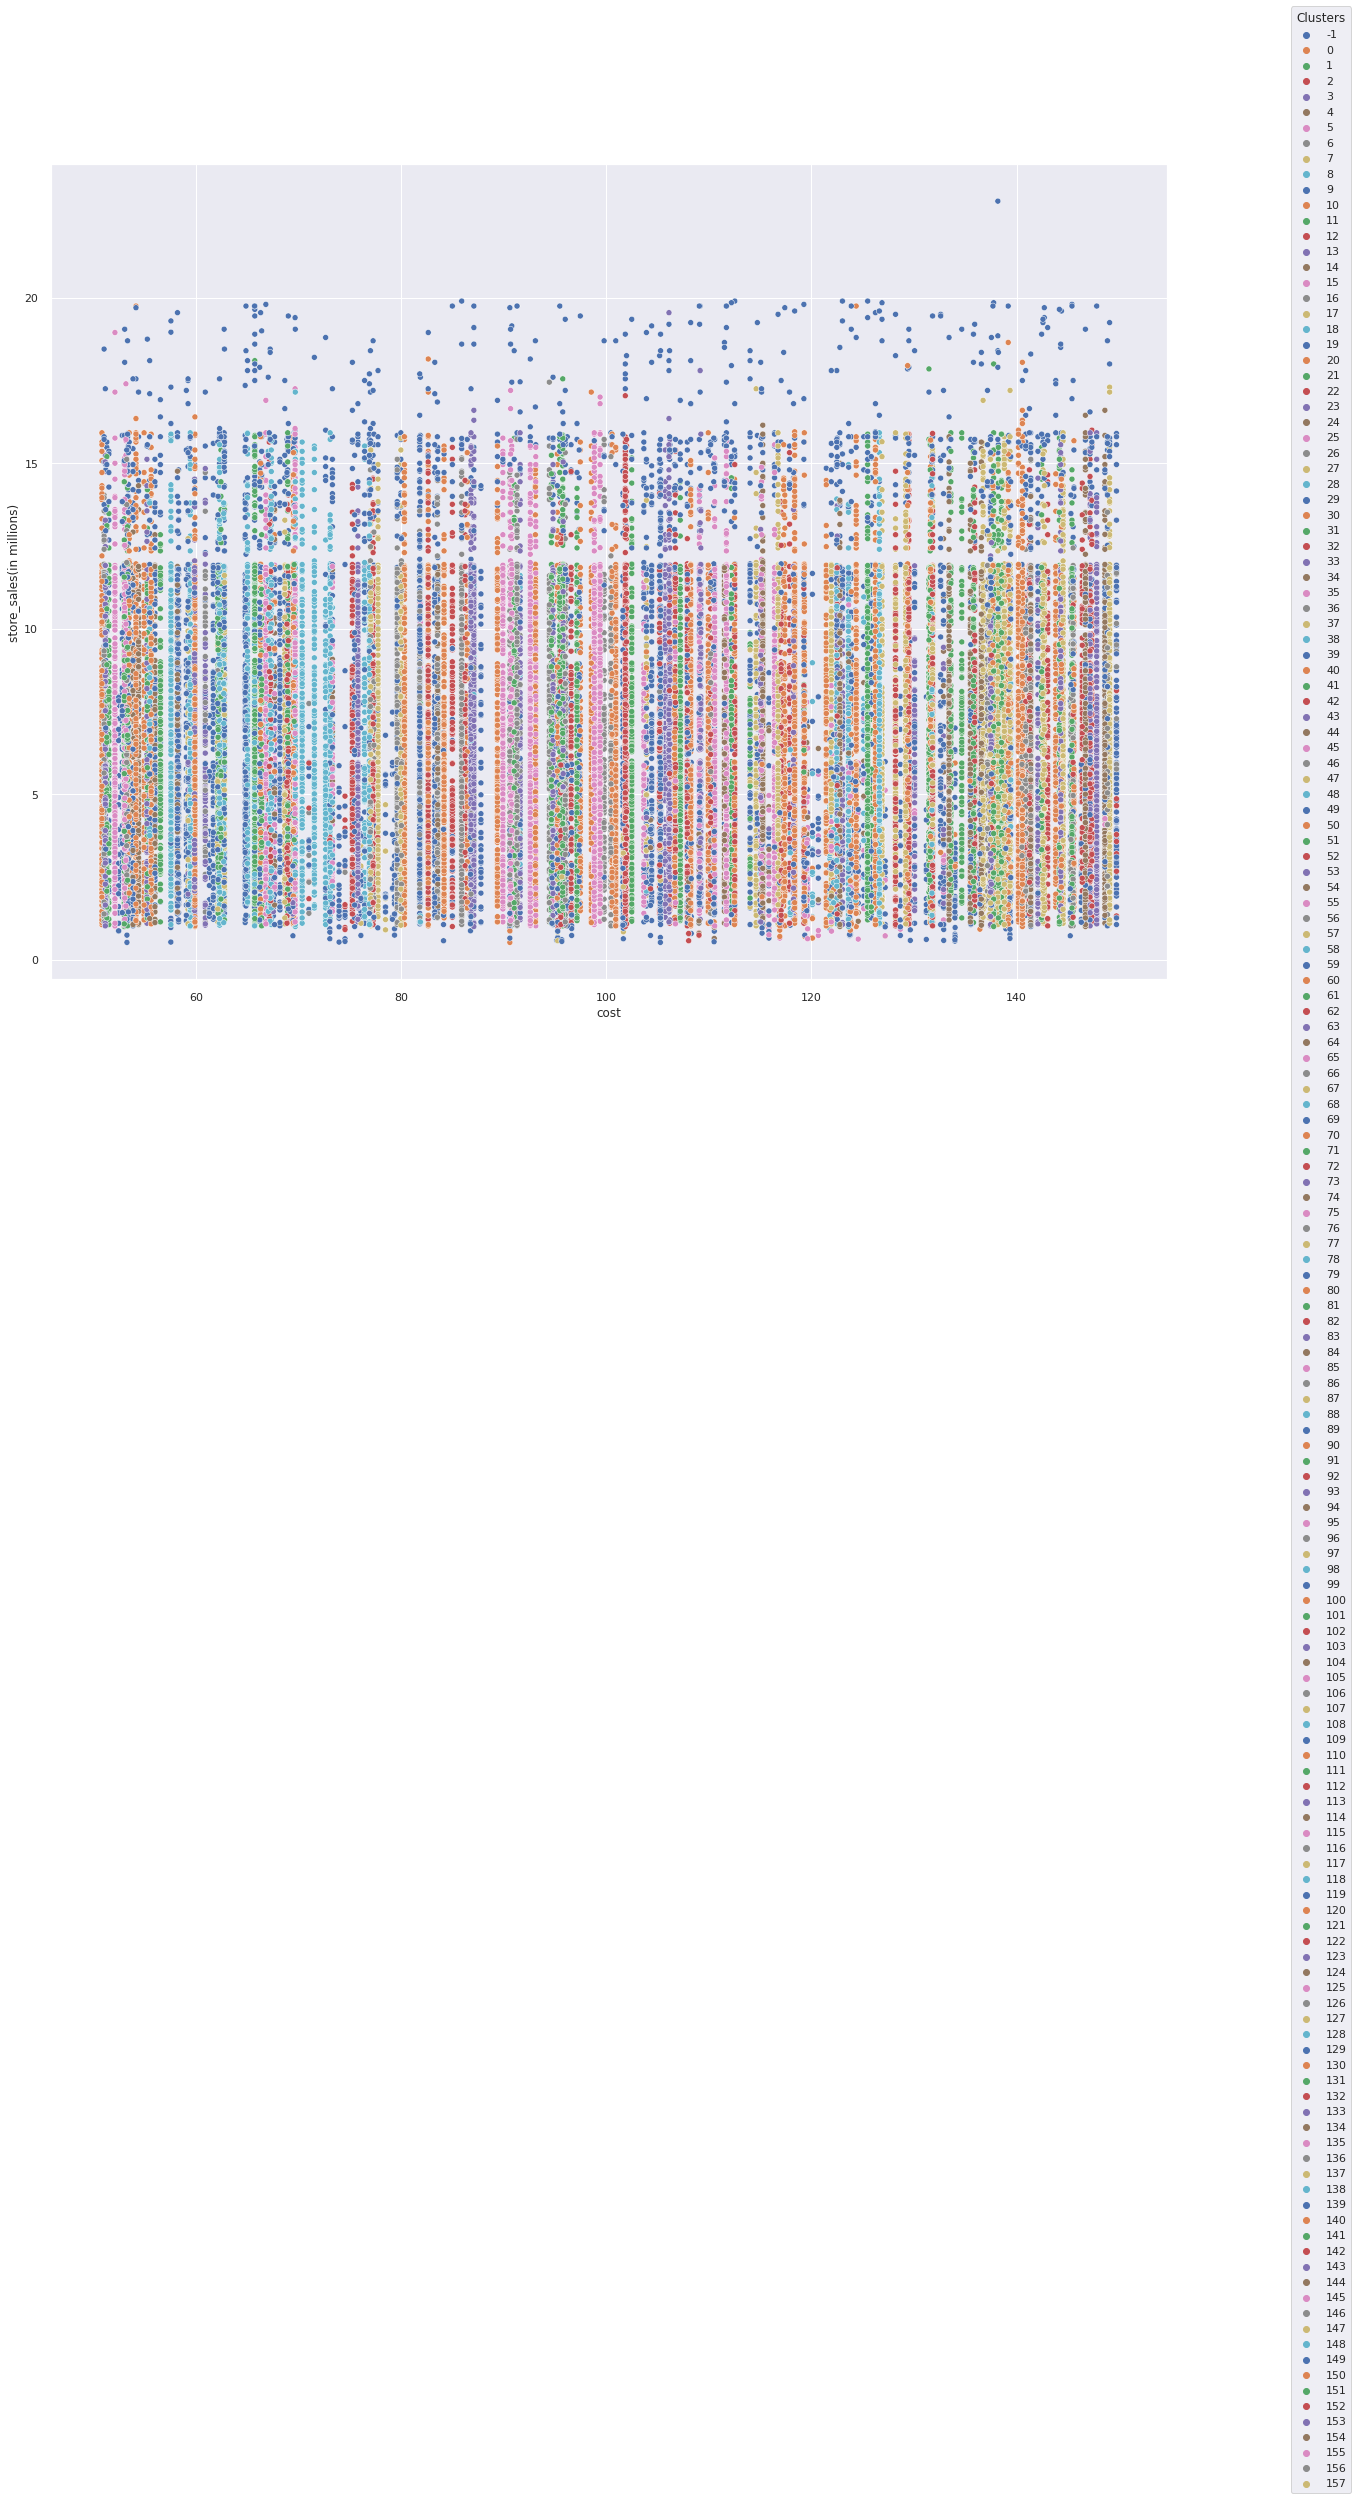

In [40]:
def dbsc(df):
  clustering = DBSCAN(eps=7, min_samples=10).fit(df)
  labels = clustering.labels_
  df["cluster_no"] = clustering.labels_

  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print("Estimated number of clusters: %d" % n_clusters_)
  print("Estimated number of noise points: %d" % n_noise_)
  
  sns.set(rc={'figure.figsize':(20,15)})
  p = sns.scatterplot(data=df, x="cost", y="store_sales(in millions)", hue=labels, legend="full", palette="deep")
  sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
  plt.show()
  
  

dbsc(X_train)